In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Avacado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data=data.drop('Unnamed: 0',axis=1)

In [4]:
data.shape

(1517, 13)

In [5]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
data.Date=pd.to_datetime(data.Date,format='%d-%m-%Y')

In [8]:
data.Date

0      2015-12-27
1      2015-12-20
2      2015-12-13
3      2015-12-06
4      2015-11-29
5      2015-11-22
6      2015-11-15
7      2015-11-08
8      2015-11-01
9      2015-10-25
10     2015-10-18
11     2015-10-11
12     2015-10-04
13     2015-09-27
14     2015-09-20
15     2015-09-13
16     2015-09-06
17     2015-08-30
18     2015-08-23
19     2015-08-16
20     2015-08-09
21     2015-08-02
22     2015-07-26
23     2015-07-19
24     2015-07-12
25     2015-07-05
26     2015-06-28
27     2015-06-21
28     2015-06-14
29     2015-06-07
          ...    
1487   2016-04-10
1488   2016-04-03
1489   2016-03-27
1490   2016-03-20
1491   2016-03-13
1492   2016-03-06
1493   2016-02-28
1494   2016-02-21
1495   2016-02-14
1496   2016-02-07
1497   2016-01-31
1498   2016-01-24
1499   2016-01-17
1500   2016-01-10
1501   2016-01-03
1502   2016-12-25
1503   2016-12-18
1504   2016-12-11
1505   2016-12-04
1506   2016-11-27
1507   2016-11-20
1508   2016-11-13
1509   2016-11-06
1510   2016-10-30
1511   201

In [9]:
data.Date.dt.weekday_name

0       Sunday
1       Sunday
2       Sunday
3       Sunday
4       Sunday
5       Sunday
6       Sunday
7       Sunday
8       Sunday
9       Sunday
10      Sunday
11      Sunday
12      Sunday
13      Sunday
14      Sunday
15      Sunday
16      Sunday
17      Sunday
18      Sunday
19      Sunday
20      Sunday
21      Sunday
22      Sunday
23      Sunday
24      Sunday
25      Sunday
26      Sunday
27      Sunday
28      Sunday
29      Sunday
         ...  
1487    Sunday
1488    Sunday
1489    Sunday
1490    Sunday
1491    Sunday
1492    Sunday
1493    Sunday
1494    Sunday
1495    Sunday
1496    Sunday
1497    Sunday
1498    Sunday
1499    Sunday
1500    Sunday
1501    Sunday
1502    Sunday
1503    Sunday
1504    Sunday
1505    Sunday
1506    Sunday
1507    Sunday
1508    Sunday
1509    Sunday
1510    Sunday
1511    Sunday
1512    Sunday
1513    Sunday
1514    Sunday
1515    Sunday
1516    Sunday
Name: Date, Length: 1517, dtype: object

In [10]:
data.Date.dt.month

0       12
1       12
2       12
3       12
4       11
5       11
6       11
7       11
8       11
9       10
10      10
11      10
12      10
13       9
14       9
15       9
16       9
17       8
18       8
19       8
20       8
21       8
22       7
23       7
24       7
25       7
26       6
27       6
28       6
29       6
        ..
1487     4
1488     4
1489     3
1490     3
1491     3
1492     3
1493     2
1494     2
1495     2
1496     2
1497     1
1498     1
1499     1
1500     1
1501     1
1502    12
1503    12
1504    12
1505    12
1506    11
1507    11
1508    11
1509    11
1510    10
1511    10
1512    10
1513    10
1514    10
1515     9
1516     9
Name: Date, Length: 1517, dtype: int64

In [11]:
new_df=pd.DataFrame({'Month':data.Date.dt.month})
new_df.head()

,Month
0,12
1,12
2,12
3,12
4,11


In [12]:
complete_data=pd.concat([data,new_df],axis=1)
complete_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [13]:
data_new=complete_data.drop('Date',axis=1)

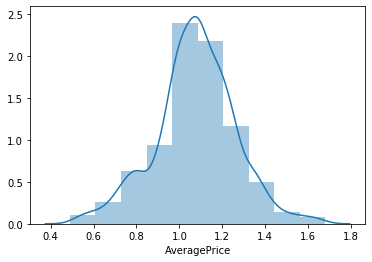

In [14]:
sns.distplot(data_new.AveragePrice,bins=10)

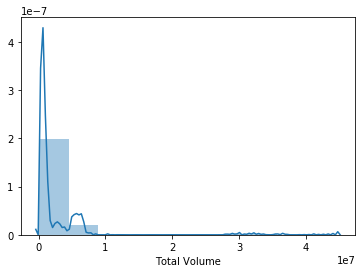

In [15]:
sns.distplot(data_new['Total Volume'],bins=10)

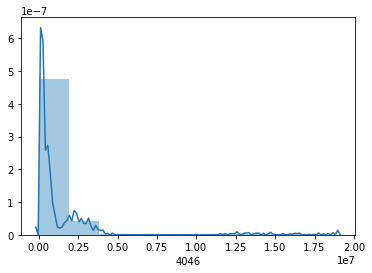

In [16]:
sns.distplot(data_new['4046'],bins=10)

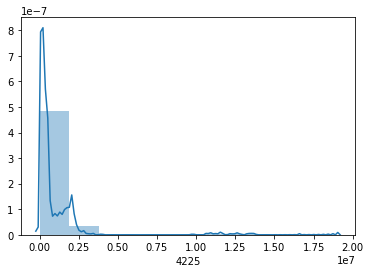

In [17]:
sns.distplot(data_new['4225'],bins=10)

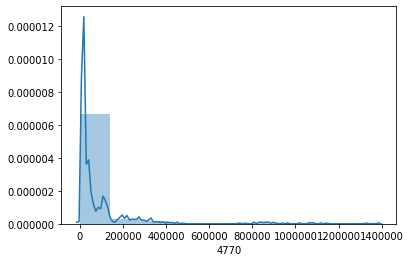

In [18]:
sns.distplot(data_new['4770'],bins=10)

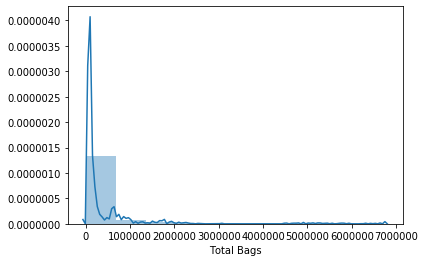

In [19]:
sns.distplot(data_new['Total Bags'],bins=10)

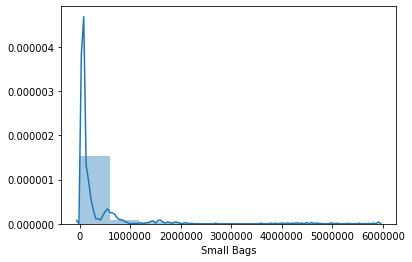

In [20]:
sns.distplot(data_new['Small Bags'],bins=10)

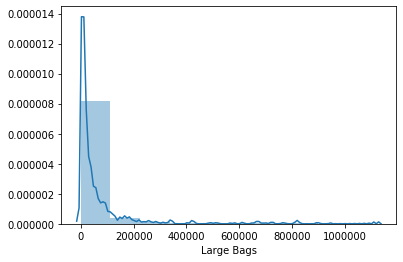

In [21]:
sns.distplot(data_new['Large Bags'],bins=10)

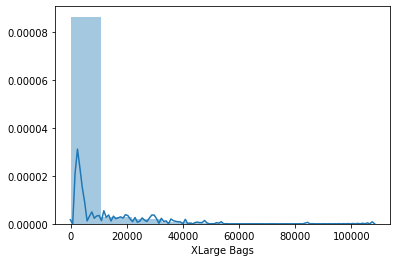

In [22]:
sns.distplot(data_new['XLarge Bags'],bins=10)

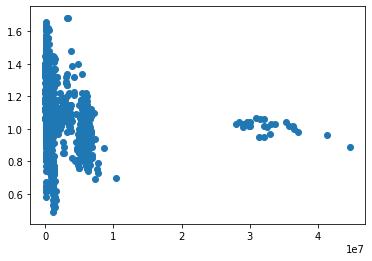

In [23]:
plt.scatter(data_new['Total Volume'],data_new['AveragePrice'])

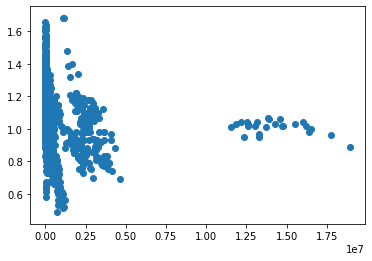

In [24]:
plt.scatter(data_new['4046'],data_new['AveragePrice'])

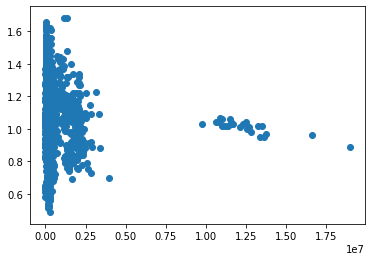

In [25]:
plt.scatter(data_new['4225'],data_new['AveragePrice'])

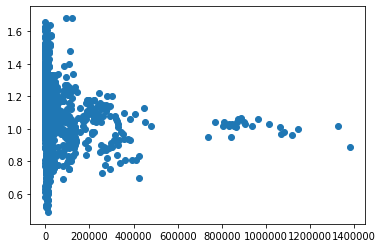

In [26]:
plt.scatter(data_new['4770'],data_new['AveragePrice'])

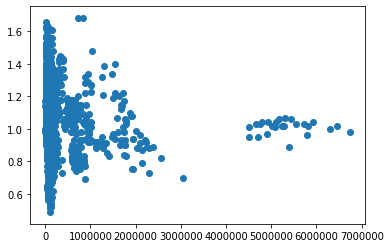

In [27]:
plt.scatter(data_new['Total Bags'],data_new['AveragePrice'])

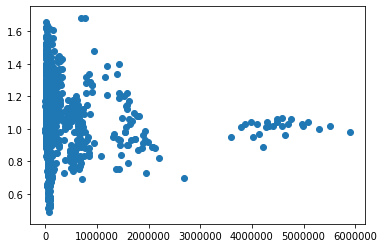

In [28]:
plt.scatter(data_new['Small Bags'],data_new['AveragePrice'])

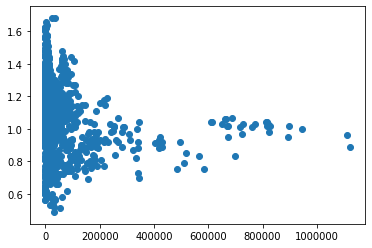

In [29]:
plt.scatter(data_new['Large Bags'],data_new['AveragePrice'])

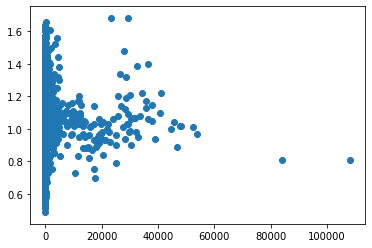

In [30]:
plt.scatter(data_new['XLarge Bags'],data_new['AveragePrice'])

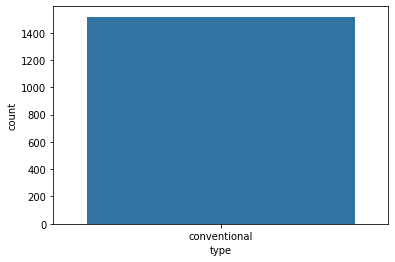

In [31]:
sns.countplot(x=data_new.type)

In [32]:
data_new.type.unique()

array(['conventional'], dtype=object)

In [33]:
data_new.drop('type',axis=1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany,11
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,2015,Albany,11
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,2015,Albany,11
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,2015,Albany,11
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,2015,Albany,11
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,2015,Albany,10


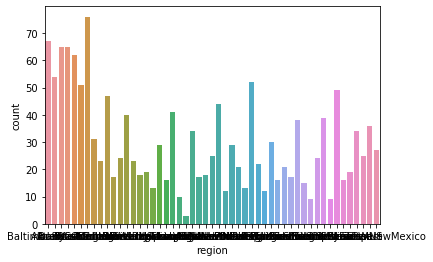

In [36]:
sns.countplot(data_new.region)

In [37]:
data_new.region.value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [38]:
data_cleaned=pd.get_dummies(data_new)

In [39]:
data_cleaned.shape

(1517, 63)

In [40]:
data_cleaned.skew()

AveragePrice                  -0.109444
Total Volume                   6.200138
4046                           6.051830
4225                           6.394926
4770                           5.405164
Total Bags                     5.366378
Small Bags                     5.355185
Large Bags                     5.144495
XLarge Bags                    5.775077
year                           1.828332
Month                          0.233418
type_conventional              0.000000
region_Albany                  4.441509
region_Atlanta                 5.017897
region_BaltimoreWashington     4.519249
region_Boise                   4.519249
region_Boston                  4.642517
region_BuffaloRochester        5.180052
region_California              4.128798
region_Charlotte               6.785823
region_Chicago                 7.943341
region_Columbus                5.419099
region_DallasFtWorth           9.296101
region_Denver                  7.768122
region_Detroit                 5.917882


In [41]:
for col in data_cleaned.iloc[:,1:9]:
    if data_cleaned.skew().loc[col]>0.55:
        data_cleaned[col]=np.log1p(data_cleaned[col])

In [42]:
data_cleaned.skew()

AveragePrice                  -0.109444
Total Volume                   0.667468
4046                          -0.160268
4225                           0.184436
4770                          -0.355508
Total Bags                     0.695502
Small Bags                     0.713843
Large Bags                    -0.912766
XLarge Bags                    0.783913
year                           1.828332
Month                          0.233418
type_conventional              0.000000
region_Albany                  4.441509
region_Atlanta                 5.017897
region_BaltimoreWashington     4.519249
region_Boise                   4.519249
region_Boston                  4.642517
region_BuffaloRochester        5.180052
region_California              4.128798
region_Charlotte               6.785823
region_Chicago                 7.943341
region_Columbus                5.419099
region_DallasFtWorth           9.296101
region_Denver                  7.768122
region_Detroit                 5.917882


In [43]:
data_in=data_cleaned.drop('AveragePrice',axis=1)
data_op=data_cleaned.AveragePrice

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
sc=MinMaxScaler()

In [46]:
data1=sc.fit_transform(data_in)

In [47]:
data_in=pd.DataFrame(data1,columns=data_in.columns)

In [48]:
data_in.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0.071694,0.074935,0.368703,0.275491,0.126721,0.127543,0.326347,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.049356,0.034425,0.347263,0.288790,0.138392,0.139486,0.329506,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.158220,0.049896,0.443707,0.345082,0.118121,0.118528,0.333511,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.101026,0.083216,0.398794,0.304015,0.073800,0.072006,0.352015,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.039073,0.065857,0.345311,0.307026,0.081961,0.079084,0.379887,0.0,0.0,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# REGRESSION METHOD TO FIND AVERAGE PRICE OF AVACADO

In [49]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.15)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at random state {} r2score is:{}'.format(i,rscore))

at random state 0 r2score is:0.7611834327691392
at random state 1 r2score is:0.8094420641757236
at random state 2 r2score is:0.7944237582865465
at random state 3 r2score is:0.8171541712389658
at random state 4 r2score is:0.7077571160285373
at random state 5 r2score is:0.7745375014447108
at random state 6 r2score is:0.8162472809660238
at random state 7 r2score is:0.7663240177720805
at random state 8 r2score is:0.8337678625286351
at random state 9 r2score is:0.8023537395992765
at random state 10 r2score is:0.7894441951162203
at random state 11 r2score is:0.7660680530990421
at random state 12 r2score is:0.8324285386231689
at random state 13 r2score is:0.7381663201521163
at random state 14 r2score is:0.8290982186919175
at random state 15 r2score is:0.7579637657153186
at random state 16 r2score is:0.8120076437501536
at random state 17 r2score is:0.789879419553299
at random state 18 r2score is:0.7972548980039852
at random state 19 r2score is:0.7893865573957196
at random state 20 r2score is:0

In [51]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=75,test_size=0.15)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
rscore,rscore1

(0.836786844912085, 0.7882766505553813)

In [52]:
max_score=0
for i in range(0,100):
    from sklearn.ensemble import RandomForestRegressor as RFR
    RFR=RFR(random_state=i)
    RFR.fit(x_train,y_train)
    y_pred=RFR.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('rscore at',i,'is:',rscore)
    if rscore>max_score:
        max_score=rscore
        final_state=i
print('Max R2 score is:',max_score,'at',final_state)

rscore at 0 is: 0.8459644867797711
rscore at 1 is: 0.8567944181892221
rscore at 2 is: 0.8392660033061432
rscore at 3 is: 0.8380997532499964
rscore at 4 is: 0.8252641541136676
rscore at 5 is: 0.8362261038915668
rscore at 6 is: 0.8473330315425581
rscore at 7 is: 0.8259713426922978
rscore at 8 is: 0.8537937133740573
rscore at 9 is: 0.8421798899763749
rscore at 10 is: 0.8460190642058334
rscore at 11 is: 0.8282428383071201
rscore at 12 is: 0.8337058490046727
rscore at 13 is: 0.8371172542190479
rscore at 14 is: 0.8497174750352546
rscore at 15 is: 0.8407143069714963
rscore at 16 is: 0.8560228535346768
rscore at 17 is: 0.8465315441293223
rscore at 18 is: 0.8272091334285534
rscore at 19 is: 0.8411667306539513
rscore at 20 is: 0.8531015915365987
rscore at 21 is: 0.8272088173430742
rscore at 22 is: 0.8586721766588804
rscore at 23 is: 0.8477006389547811
rscore at 24 is: 0.8237737057177645
rscore at 25 is: 0.8672536866934852
rscore at 26 is: 0.8412931648456015
rscore at 27 is: 0.8323833473600115
rs

In [53]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=55,max_depth=12)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
train_pred=RFR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
rscore,rscore1

(0.864320674584846, 0.9522366522037936)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.05490811444489129
Mean absolute error of train data: 0.029620068317463184
Mean squared error of test data: 0.07515325049044017
Mean squared error of train data: 0.04063233563104922


In [55]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=5,leaf_size=30)
KNR.fit(x_train,y_train)
y_pred=KNR.predict(x_test)
train_pred=KNR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
rscore,rscore1

(0.8271041930494837, 0.8706509734806152)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
GBR=GBR(alpha=0.1)

In [57]:
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
rscore=r2_score(y_test,y_pred)
rscore

0.8011288881455351

In [58]:
from sklearn.model_selection import cross_val_score as cvs

In [59]:
max_cv=0
for i in range(5,20):
    cv_res=cvs(RFR,x_train,y_train,scoring='r2',cv=i,n_jobs=-1)
    print('cv result is ',np.mean(cv_res),'for cv:',i)
    if np.mean(cv_res)>max_cv:
        max_cv=np.mean(cv_res)
        final_cv=i
print('max cv is:',max_cv,'at cv:',final_cv)
        

cv result is  0.8059030714819281 for cv: 5
cv result is  0.8013079023260317 for cv: 6
cv result is  0.8039374339199709 for cv: 7
cv result is  0.8137943246405928 for cv: 8
cv result is  0.822024265555867 for cv: 9
cv result is  0.8031295003828273 for cv: 10
cv result is  0.8095207809131726 for cv: 11
cv result is  0.8071273217439585 for cv: 12
cv result is  0.8151090115989434 for cv: 13
cv result is  0.808101147764419 for cv: 14
cv result is  0.8149410069480236 for cv: 15
cv result is  0.8067196209705275 for cv: 16
cv result is  0.8088552664279249 for cv: 17
cv result is  0.8042226696117256 for cv: 18
cv result is  0.8040435136101622 for cv: 19
max cv is: 0.822024265555867 at cv: 9


In [60]:
from sklearn.linear_model import Ridge
Ridge=Ridge(random_state=80)
Ridge.fit(x_train,y_train)
y_pred=Ridge.predict(x_test)
rscore=r2_score(y_test,y_pred)
rscore

0.7576119321065666

In [61]:
from sklearn.model_selection import GridSearchCV
parameters=[{'alpha':[0.01,0.1,1,10,100,1000]}]
grid_search=GridSearchCV(estimator=Ridge,param_grid=parameters,cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [62]:
grid_search.best_score_

0.77107315745944

In [63]:
for i in range(0,20):
    from sklearn.ensemble import AdaBoostRegressor as ABR
    ABR=ABR(base_estimator=GBR,random_state=i,n_estimators=50)
    ABR.fit(x_train,y_train)
    y_pred=ABR.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at',i,'rscore',rscore)

at 0 rscore 0.8381485691739505
at 1 rscore 0.8385053235657498
at 2 rscore 0.8401414515408785
at 3 rscore 0.8420085730538018
at 4 rscore 0.8387732456852304
at 5 rscore 0.8421708513654382
at 6 rscore 0.8388610437404639
at 7 rscore 0.8380013708266589
at 8 rscore 0.8409525885869201
at 9 rscore 0.8389518032152522
at 10 rscore 0.8406375929245609
at 11 rscore 0.8388467339181257
at 12 rscore 0.8425457654774123
at 13 rscore 0.8406999779475378
at 14 rscore 0.8419745189220893
at 15 rscore 0.8407571957781623
at 16 rscore 0.8412184337038039
at 17 rscore 0.8438210800662861
at 18 rscore 0.8401494100374496
at 19 rscore 0.8397247910647107


In [64]:
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR(base_estimator=GBR,random_state=17,n_estimators=100)
ABR.fit(x_train,y_train)
y_pred=ABR.predict(x_test)
train_pred=ABR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
rscore,rscore1

(0.8424634209911663, 0.8925790622157338)

In [65]:
for i in range(0,50):
    from sklearn.ensemble import AdaBoostRegressor as ABR
    ABR=ABR(base_estimator=RFR,random_state=i,n_estimators=50)
    ABR.fit(x_train,y_train)
    y_pred=ABR.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at',i,'rscore',rscore)

at 0 rscore 0.8825924537955132
at 1 rscore 0.8790274753392746
at 2 rscore 0.8821812398016259
at 3 rscore 0.8800495117606191
at 4 rscore 0.8823804623099856
at 5 rscore 0.885831679008221
at 6 rscore 0.8850020333125591
at 7 rscore 0.8837530852221362
at 8 rscore 0.8821001265026299
at 9 rscore 0.8839342133896524
at 10 rscore 0.8866256275338174
at 11 rscore 0.8789583957247815
at 12 rscore 0.8803470483811472
at 13 rscore 0.884632140289053
at 14 rscore 0.8856886506970622
at 15 rscore 0.8812379269981203
at 16 rscore 0.8838128463576412
at 17 rscore 0.8774904790034019
at 18 rscore 0.8835108227369893
at 19 rscore 0.88153206220895
at 20 rscore 0.8842922220792104
at 21 rscore 0.8765169322642786
at 22 rscore 0.8841658692025852
at 23 rscore 0.8789855306638558
at 24 rscore 0.8790713669698491
at 25 rscore 0.8814535226876868
at 26 rscore 0.8788075033894734
at 27 rscore 0.8814186095830746
at 28 rscore 0.8817282778750053
at 29 rscore 0.885837958993543
at 30 rscore 0.8802903373306494
at 31 rscore 0.88137585

In [66]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=75,test_size=0.10)
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR(base_estimator=RFR,random_state=i,n_estimators=50)
ABR.fit(x_train,y_train)
y_pred=ABR.predict(x_test)
train_pred=ABR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
rscore,rscore1

(0.8932940916122706, 0.9787180260469099)

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.05128915749450874
Mean absolute error of train data: 0.02422258357257924
Mean squared error of test data: 0.06516797983218642
Mean squared error of train data: 0.02734993872603677


In [68]:
y_pred=ABR.predict(x_test)
print('Predicted average prices for test data are:',y_pred)
print('Actual average prices for test data are:',y_test)

Predicted average prices for test data are: [1.09523163 0.93246907 1.26386364 1.16175141 0.96114983 1.17816667
 0.918      1.18036894 1.33798533 1.12668011 0.7555     1.17132381
 1.16259635 1.27383333 1.14768029 1.08809881 1.19769401 1.12354423
 1.12615671 1.31       1.0085     1.30687302 1.34977778 1.10867398
 1.437      0.97172241 1.05171569 1.13771441 0.82393103 0.93817143
 1.106      1.0119657  0.857      1.192      1.27576389 1.18912563
 0.833      1.08672668 1.04018366 1.002775   0.64085714 1.16296935
 1.0620274  1.06234112 0.615      1.1595011  0.99855135 1.08673333
 1.28266146 1.15261459 1.02341152 1.20597001 1.13763868 1.01272222
 1.04534328 1.00121956 1.17709348 1.02716665 1.3086     1.05953148
 1.11016667 1.16478789 1.29214903 0.97911942 1.3285     0.99658008
 1.12571137 1.557      1.456      0.864      1.55       1.15214385
 1.07342857 0.82637326 1.16875418 0.87125614 1.27310859 1.08495628
 1.03888598 1.13277671 1.05773233 1.1480524  1.02091794 0.78281604
 1.149      1.1000

In [69]:
Avacado=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred})

In [70]:
Avacado

,Actual price,Predicted price
324,1.03,1.095232
1164,0.91,0.932469
1125,1.32,1.263864
236,1.23,1.161751
855,0.91,0.961150
1319,1.11,1.178167
1212,0.92,0.918000
1170,1.16,1.180369
1141,1.35,1.337985
1085,1.19,1.126680


In [71]:
Avacado.to_csv('Avacado_regression.csv')

In [72]:
from sklearn.externals import joblib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [73]:
joblib.dump(ABR,'ABR_with-base_RFC.pkl')

['ABR_with-base_RFC.pkl']

# CLASSIFICATION METHOD TO FIND REGION

In [35]:
data_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [36]:
data_new=data_new.drop('type',axis=1)

In [37]:
data_in=data_new.drop('region',axis=1)
data_op=data_new.region

In [38]:
data_op.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder=LabelEncoder()
encoder.fit(data_op)
y_encoded=encoder.transform(data_op)
y_encoded

array([0, 0, 0, ..., 7, 7, 7])

In [41]:
data_op=pd.DataFrame(y_encoded,columns=['Region'])

In [42]:
data_op['Region'].value_counts()

6     76
0     67
2     65
3     65
4     62
1     54
31    52
5     51
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
22    34
47    34
7     31
34    30
28    29
17    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
14    18
10    17
37    17
23    17
18    16
35    16
45    16
39    15
30    13
16    13
27    12
33    12
20    10
43     9
40     9
21     3
Name: Region, dtype: int64

In [43]:
data_op['Region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [44]:
from sklearn.model_selection import train_test_split as tts

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.20,stratify=data_op)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy score at',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('max accuracy is ',max_score,'at',final_state)

accuracy score at 0 is 0.8486842105263158
accuracy score at 1 is 0.8486842105263158
accuracy score at 2 is 0.8092105263157895
accuracy score at 3 is 0.8519736842105263
accuracy score at 4 is 0.8453947368421053
accuracy score at 5 is 0.8552631578947368
accuracy score at 6 is 0.8256578947368421
accuracy score at 7 is 0.819078947368421
accuracy score at 8 is 0.8125
accuracy score at 9 is 0.8519736842105263
accuracy score at 10 is 0.819078947368421
accuracy score at 11 is 0.8223684210526315
accuracy score at 12 is 0.819078947368421
accuracy score at 13 is 0.8388157894736842
accuracy score at 14 is 0.8026315789473685
accuracy score at 15 is 0.819078947368421
accuracy score at 16 is 0.8289473684210527
accuracy score at 17 is 0.8388157894736842
accuracy score at 18 is 0.8355263157894737
accuracy score at 19 is 0.8421052631578947
accuracy score at 20 is 0.8322368421052632
accuracy score at 21 is 0.8125
accuracy score at 22 is 0.8289473684210527
accuracy score at 23 is 0.8519736842105263
accura

In [46]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=66,test_size=0.20,stratify=data_op)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
accuracy,accuracy1

(0.8717105263157895, 0.8598516075845012)

In [47]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score as cvs
KNC=KNC()

In [48]:
max_cv=0
for i in range(5,20):
        cv_result=cvs(KNC,x_train,y_train,scoring='accuracy',cv=i)
        print('cv result is: ',np.mean(cv_result), 'for cv:',i)
        if np.mean(cv_result)>max_cv:
            max_cv=np.mean(cv_result)
            final_state=i
print('max cv is:',max_cv,'at cv:',final_state)

cv result is:  0.8188475145345269 for cv: 5
cv result is:  0.8190237548334459 for cv: 6
cv result is:  0.8189824197925405 for cv: 7
cv result is:  0.8178306340644214 for cv: 8
cv result is:  0.8192118078283323 for cv: 9
cv result is:  0.8168050955324239 for cv: 10
cv result is:  0.8225085349813046 for cv: 11
cv result is:  0.820454684687901 for cv: 12
cv result is:  0.8224054084864612 for cv: 13
cv result is:  0.8196523389403011 for cv: 14
cv result is:  0.8239701641227521 for cv: 15
cv result is:  0.8190574596893437 for cv: 16
cv result is:  0.8182563654029729 for cv: 17
cv result is:  0.8193605057329898 for cv: 18
cv result is:  0.8229468706744607 for cv: 19
max cv is: 0.8239701641227521 at cv: 15


In [49]:
from sklearn.naive_bayes import GaussianNB as GNB
GNB=GNB()

In [50]:
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
train_pred=GNB.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)

0.8552631578947368 0.9076669414674361


In [51]:
from sklearn.neighbors import KNeighborsClassifier as KNC
KNC=KNC(leaf_size=30,n_neighbors=4)
KNC.fit(x_train,y_train)
y_pred=KNC.predict(x_test)
train_pred=KNC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)

0.8256578947368421 0.8961253091508656


In [52]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=66,test_size=0.20,stratify=data_op)
for i in range(0,100):
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC(criterion='gini',max_depth=10,random_state=i)
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    train_pred=DTC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print('test_accuracy:',accuracy,'train_accuracy',accuracy1)


test_accuracy: 0.680921052631579 train_accuracy 0.761747732893652
test_accuracy: 0.680921052631579 train_accuracy 0.761747732893652
test_accuracy: 0.6776315789473685 train_accuracy 0.761747732893652
test_accuracy: 0.6743421052631579 train_accuracy 0.761747732893652
test_accuracy: 0.6842105263157895 train_accuracy 0.761747732893652
test_accuracy: 0.680921052631579 train_accuracy 0.761747732893652
test_accuracy: 0.6776315789473685 train_accuracy 0.761747732893652
test_accuracy: 0.6776315789473685 train_accuracy 0.761747732893652
test_accuracy: 0.6776315789473685 train_accuracy 0.761747732893652
test_accuracy: 0.6875 train_accuracy 0.761747732893652
test_accuracy: 0.6743421052631579 train_accuracy 0.761747732893652
test_accuracy: 0.6875 train_accuracy 0.761747732893652
test_accuracy: 0.6776315789473685 train_accuracy 0.761747732893652
test_accuracy: 0.6875 train_accuracy 0.761747732893652
test_accuracy: 0.6875 train_accuracy 0.761747732893652
test_accuracy: 0.6907894736842105 train_accura

In [53]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=66,test_size=0.20,stratify=data_op)
for i in range(0,100):
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC(criterion='entropy',max_depth=10,random_state=i)
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    train_pred=DTC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print('at:',i,'test_accuracy:',accuracy,'train_accuracy',accuracy1)

at: 0 test_accuracy: 0.881578947368421 train_accuracy 1.0
at: 1 test_accuracy: 0.8881578947368421 train_accuracy 1.0
at: 2 test_accuracy: 0.8914473684210527 train_accuracy 1.0
at: 3 test_accuracy: 0.8881578947368421 train_accuracy 1.0
at: 4 test_accuracy: 0.881578947368421 train_accuracy 1.0
at: 5 test_accuracy: 0.8947368421052632 train_accuracy 1.0
at: 6 test_accuracy: 0.8881578947368421 train_accuracy 1.0
at: 7 test_accuracy: 0.8914473684210527 train_accuracy 1.0
at: 8 test_accuracy: 0.9046052631578947 train_accuracy 1.0
at: 9 test_accuracy: 0.8947368421052632 train_accuracy 1.0
at: 10 test_accuracy: 0.8881578947368421 train_accuracy 1.0
at: 11 test_accuracy: 0.8914473684210527 train_accuracy 1.0
at: 12 test_accuracy: 0.8980263157894737 train_accuracy 1.0
at: 13 test_accuracy: 0.8914473684210527 train_accuracy 1.0
at: 14 test_accuracy: 0.8947368421052632 train_accuracy 1.0
at: 15 test_accuracy: 0.8914473684210527 train_accuracy 1.0
at: 16 test_accuracy: 0.8914473684210527 train_accur

In [54]:
from sklearn.tree import DecisionTreeClassifier as DTC
DTC=DTC(criterion='entropy',max_depth=10,random_state=8)
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
train_pred=DTC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
accuracy,accuracy1

(0.9046052631578947, 1.0)

In [62]:
x_test.shape,y_test.shape

((304, 11), (304, 1))

In [102]:
y_pred=DTC.predict(x_test)
y_pred=y_pred.reshape(-1,1)
y_pred.shape

(304, 1)

In [111]:
avacado_pred=pd.DataFrame(y_pred,columns=['Predicted'],index=y_test.index)
avacado_pred

,Predicted
226,8
39,0
1182,48
1185,48
674,26
1333,3
245,4
132,44
985,40
664,26


In [112]:
avacado_actual=pd.DataFrame(y_test)

In [113]:
avacado_classifier=pd.concat([avacado_pred,avacado_actual],axis=1)

In [114]:
avacado_classifier

,Predicted,Region
226,8,8
39,0,0
1182,48,48
1185,48,48
674,26,26
1333,3,3
245,4,8
132,44,3
985,40,40
664,26,26


In [117]:
avacado_classifier.to_csv('avacado_classifier_result.csv')

In [115]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [116]:
joblib.dump(DTC,'DTC_entropy_avacado_classi.pkl')

['DTC_entropy_avacado_classi.pkl']